<a href="https://colab.research.google.com/github/komalsharmavlog/TheSparksFoundation/blob/master/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation Using Word Embeddings



##Install Dependencies

In [1]:
!pip install gensim
from gensim.models import KeyedVectors
import numpy as np


##Download Google News Vectors

In [2]:
!wget -P /root/vectors/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-01-04 15:43:26--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.66.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.66.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/vectors/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  85.1MB/s    in 23s     

2021-01-04 15:43:49 (67.3 MB/s) - ‘/root/vectors/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [3]:
GOOGLE_NEWS_VECTORS = '/root/vectors/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(GOOGLE_NEWS_VECTORS, binary=True)
print("Vectors loaded successfully: "+str(len(word2vec.vocab)))

Vectors loaded successfully: 3000000


##Vectors

Example Sentences:

*   `Winter` is coming.
*   Any `man` who must say "I am the `king`" is no true `king`.




In [8]:
keywords = [["winter"], ["man"], ["king"]]

for w in keywords:
  word = w[0]
  print("Word: "+word)
  vector = word2vec.get_vector(word)
  print("Vector length: {}".format(len(vector)))
  print(vector)

Word: winter
Vector length: 300
[-0.05883789  0.33789062 -0.13769531 -0.05664062  0.01940918  0.00175476
 -0.02478027 -0.10009766 -0.01953125  0.18164062 -0.0625     -0.13867188
 -0.01306152  0.06835938  0.03198242 -0.10546875 -0.10888672  0.03393555
  0.12402344 -0.18164062 -0.00273132  0.3125     -0.08886719 -0.16113281
 -0.06689453 -0.03833008  0.15820312  0.12451172 -0.00227356  0.09472656
 -0.10253906  0.1015625   0.25976562  0.21484375 -0.15136719 -0.1484375
 -0.25976562 -0.37695312 -0.22460938  0.00909424  0.3515625  -0.25976562
  0.25390625 -0.01574707 -0.18847656 -0.00306702  0.08447266  0.11132812
 -0.09716797  0.3046875   0.09521484 -0.12890625 -0.10205078  0.06494141
  0.01660156 -0.01660156 -0.05859375  0.07421875  0.06445312 -0.10986328
 -0.21972656 -0.08544922  0.00756836 -0.08007812  0.07568359  0.15429688
 -0.04589844  0.02990723 -0.08056641 -0.00897217  0.35351562 -0.03515625
 -0.16308594  0.07373047  0.00375366  0.18066406 -0.06835938 -0.02758789
 -0.13378906 -0.0639

##Cosine Similarity



Consine Similarity formula: 

$\text{cos}(a,b) = \frac{a \cdot b}{||a|| \cdot  ||b||}$

In [9]:
def cosine_similarity(x1, x2):
  return np.round(np.dot(x1, x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)),5)
print(cosine_similarity(word2vec.get_vector("winter"), word2vec.get_vector("summer")))

0.71555


In [10]:
word2vec.similarity("winter","summer")

0.7155519

##Similar Words

In [11]:
for w in keywords:
  print(word2vec.most_similar(positive=w, topn = 10))


[('summer', 0.7155519127845764), ('winters', 0.7001105546951294), ('wintertime', 0.6972676515579224), ('spring', 0.6890672445297241), ('springtime', 0.6532734632492065), ('summertime', 0.6273113489151001), ('autumn', 0.6269329786300659), ('Groundhog_predicts', 0.6260344982147217), ('midwinter', 0.6233881711959839), ('warmer_weather', 0.6034383177757263)]
[('woman', 0.7664012908935547), ('boy', 0.6824870109558105), ('teenager', 0.6586930155754089), ('teenage_girl', 0.6147903800010681), ('girl', 0.5921714305877686), ('suspected_purse_snatcher', 0.5716364979743958), ('robber', 0.5585119128227234), ('Robbery_suspect', 0.5584409236907959), ('teen_ager', 0.5549196600914001), ('men', 0.5489763021469116)]
[('kings', 0.7138046026229858), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864822864532471), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.543294370174

##References






*   [Efficient estimation of word representations in vector space](https://arxiv.org/pdf/1301.3781.pdf) 
*   [Word embeddings](https://https://en.wikipedia.org/wiki/Word_embedding) 
*   [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity)
*   [Gensim](https://github.com/RaRe-Technologies/gensim) 

# **Data Augmentation using Back Translation**

# Install Dependencies

In [12]:
!pip install fastBPE sacremoses subword_nmt hydra_core
import torch

     |████████████████████████████████| 890kB 21.6MB/s 
     |████████████████████████████████| 122kB 38.0MB/s 
     |████████████████████████████████| 112kB 50.3MB/s 
     |████████████████████████████████| 276kB 35.6MB/s 
  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp36-cp36m-linux_x86_64.whl size=481516 sha256=96d2be5f81e1ddfe1d2db869e98b4439ec714782a82eea0e45da5e2f9054c6af
  Stored in directory: /root/.cache/pip/wheels/f3/0c/9c/fc62058b4d473a5602bcd3d3edfece796f123875379ea82d79
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=594ea70d1cb445cb9424d0067c5399c0714baba11585440cb417a19b6eddb7ab
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp36-none-any.whl size=141231 sha256=9ab4b954d747d5a895fb373d0584784b6a4573c2392d6907d1c6a88c37204033
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa

# Load Translation Models

In [ ]:
english_to_german = torch.hub.load('pytorch/fairseq', 'transformer.wmt19.en-de.single_model', tokenizer='moses', bpe='fastbpe')


# Apply Translation

In [11]:
input = "back translation is one of the best data augmentation techniques"
result = english_to_german.generate(english_to_german.encode(input), beam=10)
for r in result:
  output = english_to_german.decode(r['tokens'])
  print(output)

Rückübersetzung ist eine der besten Techniken zur Datenvermehrung
Rückübersetzung ist eine der besten Techniken zur Datenerweiterung
Back Translation ist eine der besten Techniken zur Datenerweiterung
Back Translation ist eine der besten Techniken zur Datenvermehrung
Rückübersetzung ist eine der besten Techniken zur Datenvergrößerung
Die Rückübersetzung ist eine der besten Techniken zur Datenvermehrung
Die Rückübersetzung ist eine der besten Techniken zur Datenerweiterung
Rückübersetzung ist eine der besten Methoden zur Datenvermehrung
Back Translation ist eine der besten Methoden zur Datenerweiterung
Zurück-Übersetzung ist eine der besten Techniken zur Datenvermehrung


# Apply Backtranslation to augment dataset

In [12]:
german_to_english = torch.hub.load('pytorch/fairseq', 'transformer.wmt19.de-en.single_model', tokenizer='moses', bpe='fastbpe')

Using cache found in /root/.cache/torch/hub/pytorch_fairseq_master
100%|██████████| 2992273886/2992273886 [01:52<00:00, 26699608.86B/s]


In [13]:
data = ["back translation is one of the best data augmentation techniques"]

def augment_data(data, x_to_y, y_to_x, n):
  augmented_data = dict()
  for d in data:
    augmented_data[d] = list()
    y_result = x_to_y.generate(x_to_y.encode(d), beam=n)
    for y in y_result:
      x_result = y_to_x.generate(y_to_x.encode(x_to_y.decode(y['tokens'])), beam=n)
      for x in x_result:
        augmented_data[d].append(y_to_x.decode(x['tokens']))
  return augmented_data

def print_data(data):
  for inp, out in data.items():
    print(inp + ":")
    for x in out:
      print(" "+ x)

result = augment_data(data, english_to_german, german_to_english, 3)

print_data(result)


back translation is one of the best data augmentation techniques:
 Reverse translation is one of the best techniques for data reproduction
 Retranslation is one of the best techniques for data reproduction
 Re-translation is one of the best techniques for data reproduction
 Reverse translation is one of the best techniques for data expansion
 Reverse translation is one of the best techniques for data extension
 Reverse translation is one of the best techniques for extending data
 Back Translation is one of the best techniques for data expansion
 Back Translation is one of the best techniques for data extension
 Back translation is one of the best techniques for data expansion


# Semantic Similarity with Universal Sentence Encoder

# Install Dependencies

In [14]:
!pip install seaborn
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Model

In [15]:
use_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(use_url)
def get_embeddings(input):
  return model(input)

INFO:absl:resolver HttpCompressedFileResolver does not support the provided handle.
INFO:absl:resolver GcsCompressedFileResolver does not support the provided handle.


# Calculate Semantic Similarity

In [17]:
def plot_similarity(labels, embeddings, rotation):
  corr = np.inner(embeddings, embeddings)
  sns.set(font_scale=1.2)
  plot = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  plot.set_xticklabels(labels, rotation=rotation)
  plot.set_title("Semantic Textual Similarity")

def run(data):
  embeddings = get_embeddings(data)
  plot_similarity(data, embeddings, 90)

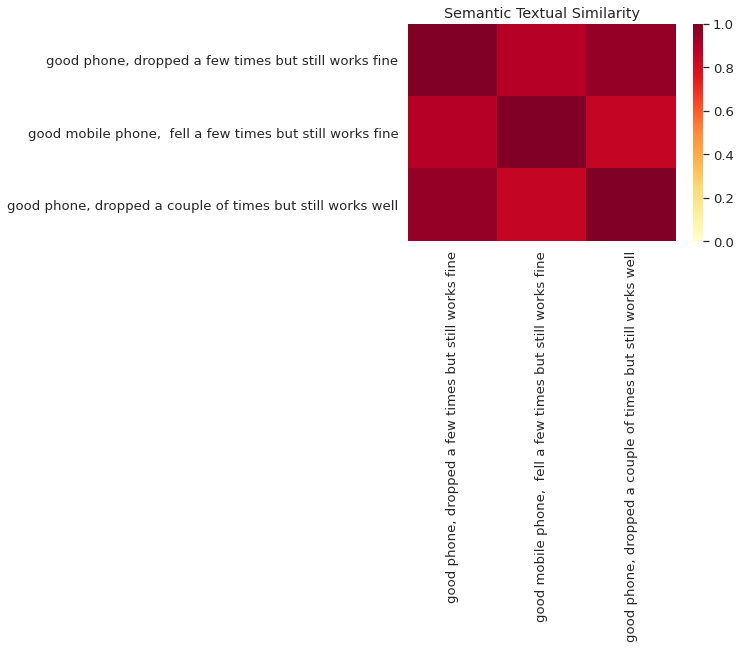

In [18]:
data = [
    "good phone, dropped a few times but still works fine",
    "good mobile phone,  fell a few times but still works fine",
    "good phone, dropped a couple of times but still works well"
]

run(data)